## Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from sklearn.cluster import KMeans

## Fetching Datasets

### Fetching Dataset 1

In [2]:
df1= pd.read_csv('1_ev_charger_dataset.csv')

In [3]:
df1.head()

,Region,2W,3W,4W,Bus,Chargers
0,Uttar Pradesh,9852,42881,458,197,207
1,Maharastra,38558,893,1895,186,317
2,Karnataka,32844,568,589,57,172
3,Tamil Nadu,25642,396,426,0,256
4,Gujarat,22359,254,423,22,228


In [4]:
df1

,Region,2W,3W,4W,Bus,Chargers
0,Uttar Pradesh,9852,42881,458,197,207
1,Maharastra,38558,893,1895,186,317
2,Karnataka,32844,568,589,57,172
3,Tamil Nadu,25642,396,426,0,256
4,Gujarat,22359,254,423,22,228
5,Delhi,11756,5287,1578,186,72
6,Bihar,2388,10783,89,36,37
7,Assam,357,11547,42,0,20
8,Kerala,10345,308,578,0,131
9,Odisha,9540,253,89,0,18


### Fetching Dataset 2

In [5]:
df2= pd.read_csv('3_ev_market_india_dataset.csv')

In [6]:
df2.head()

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997


## Exploratory Data Analysis(EDA)

### Analysis of Datasets

In [7]:
# Checking the Shape of the Datasets
print('Shape of Dataset1 is ',df1.shape)
print('Shape of Dataset2 is ',df2.shape)

Shape of Dataset1 is  (24, 6)
Shape of Dataset2 is  (103, 14)


In [8]:
# Checking the info
print("********** Dataset1 **********")
print(df1.info())
print("********** Dataset2 **********")
print(df2.info())

********** Dataset1 **********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    24 non-null     object
 1   2W        24 non-null     int64 
 2   3W        24 non-null     int64 
 3   4W        24 non-null     int64 
 4   Bus       24 non-null     int64 
 5   Chargers  24 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.3+ KB
None
********** Dataset2 **********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            103 non-null    object 
 1   Model            103 non-null    object 
 2   AccelSec         103 non-null    float64
 3   TopSpeed_KmH     103 non-null    int64  
 4   Range_Km         103 non-null    int64  
 5   Efficiency_WhKm  103 non-null    int64  
 6  

In [9]:
# Checking the Statistical summary of the datasets 
print("-----------------Dataset1-------------------\n")
df1.describe()

-----------------Dataset1-------------------



,2W,3W,4W,Bus,Chargers
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,8421.458333,3853.166667,334.041667,28.500000,106.791667
std,10942.261145,8850.690961,476.930628,63.771331,96.623869
min,187.000000,234.000000,12.000000,0.000000,10.000000
25%,848.000000,512.750000,34.750000,0.000000,25.000000
50%,2967.500000,931.000000,129.000000,0.000000,67.500000
75%,10697.750000,2659.250000,434.000000,5.500000,180.250000
max,38558.000000,42881.000000,1895.000000,197.000000,317.000000


In [10]:
print("-----------------Dataset2-------------------\n")
df2.describe()


-----------------Dataset2-------------------



,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,Seats,PriceEuro
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,7.396117,179.194175,338.786408,189.165049,444.271845,4.883495,55811.563107
std,3.017430,43.573030,126.014444,29.566839,203.949253,0.795834,34134.665280
min,2.100000,123.000000,95.000000,104.000000,170.000000,2.000000,20129.000000
25%,5.100000,150.000000,250.000000,168.000000,260.000000,5.000000,34429.500000
50%,7.300000,160.000000,340.000000,180.000000,440.000000,5.000000,45000.000000
75%,9.000000,200.000000,400.000000,203.000000,555.000000,5.000000,65000.000000
max,22.400000,410.000000,970.000000,273.000000,940.000000,7.000000,215000.000000


### Analysis of 2Wheeler EV's

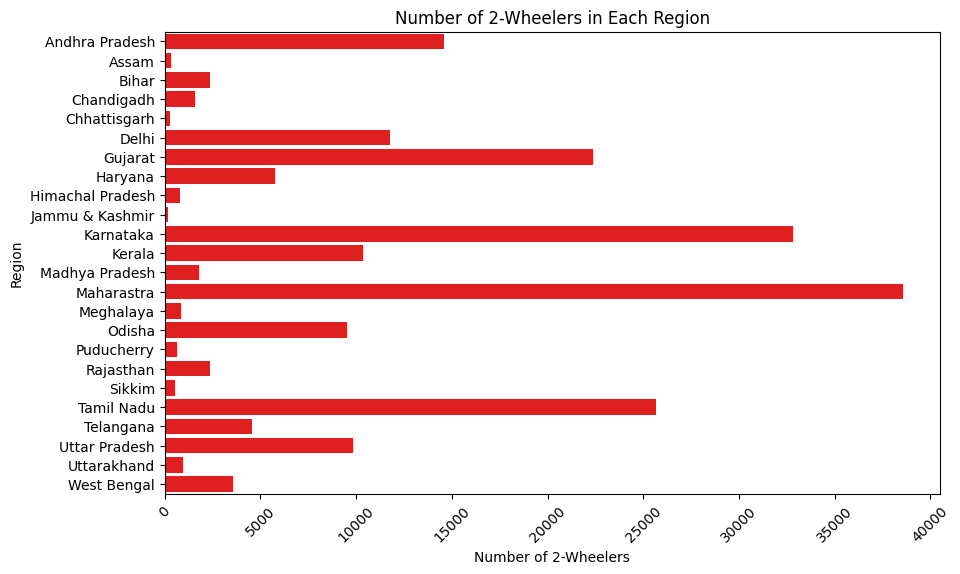

In [11]:
# 2 wheelers data visualization from dataset 1
plt.figure(figsize=(10, 6))
sns.barplot(data=df1,y=df1['Region'].sort_values(ascending=True), x=df1['2W'], color='red')
plt.title('Number of 2-Wheelers in Each Region')
plt.ylabel('Region')
plt.xlabel('Number of 2-Wheelers')
plt.xticks(rotation=45)
plt.show()

Observation :- Maharashtra, Gujarat, Tamilnadu, Karnataka and Andhra Pradesh are among the top states with the majority of EV 2-wheelers while Assam, Chhattisgarh, Sikkim, J&K with the least.

### Analysis of 3Wheeler EV's

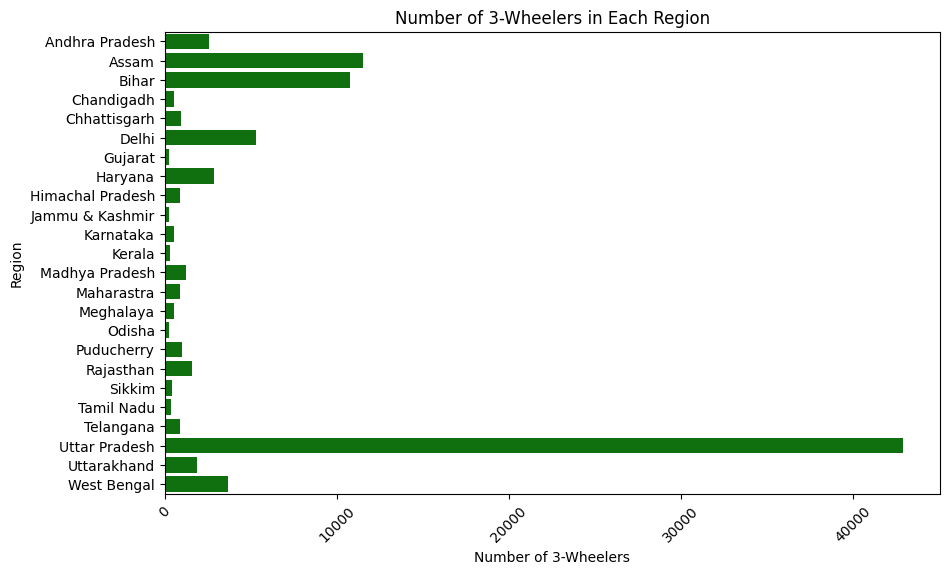

In [12]:
# 3 wheelers data visualization from dataset 1
plt.figure(figsize=(10, 6))
sns.barplot(data=df1,y=df1['Region'].sort_values(ascending=True), x=df1['3W'], color='green')
plt.title('Number of 3-Wheelers in Each Region')
plt.ylabel('Region')
plt.xlabel('Number of 3-Wheelers')
plt.xticks(rotation=45)
plt.show()

Observation: Uttar Pradesh, Assam and Bihar are among the top states with the majority of EV 3-wheelers while the remaining states don't seem to depend on the same.

### Analysis of 4Wheeler EV's

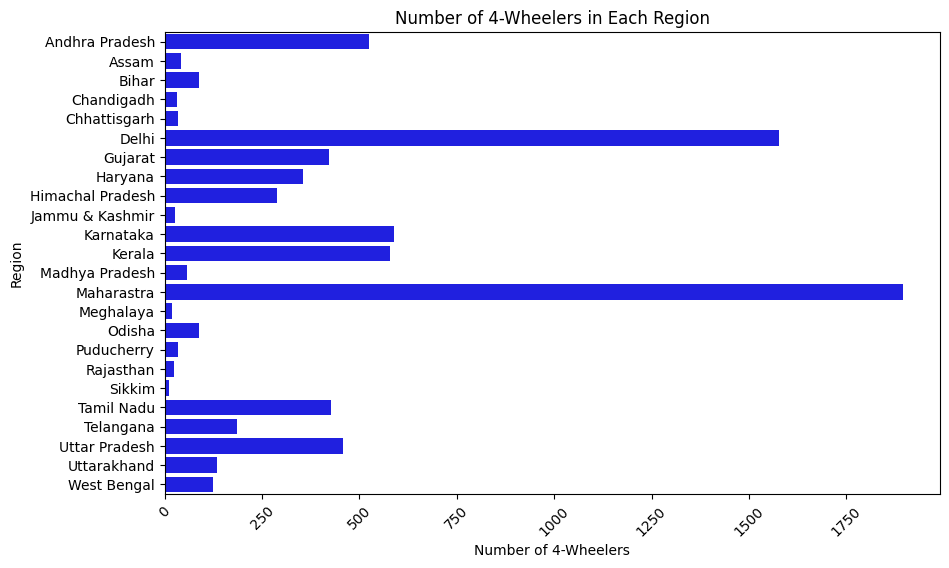

In [13]:
# 4 wheelers data visualization from dataset 1
plt.figure(figsize=(10, 6))
sns.barplot(data=df1,y=df1['Region'].sort_values(ascending=True), x=df1['4W'], color='blue')
plt.title('Number of 4-Wheelers in Each Region')
plt.ylabel('Region')
plt.xlabel('Number of 4-Wheelers')
plt.xticks(rotation=45)
plt.show()

Observation: Maharashtra, Delhi, Karnataka, Kerala and Andhra Pradhesh are among the top states with the majority of EV 4-wheelers while the remaining states have less number of EV 4-wheelers.

### Analysis of charging stations sanctioned

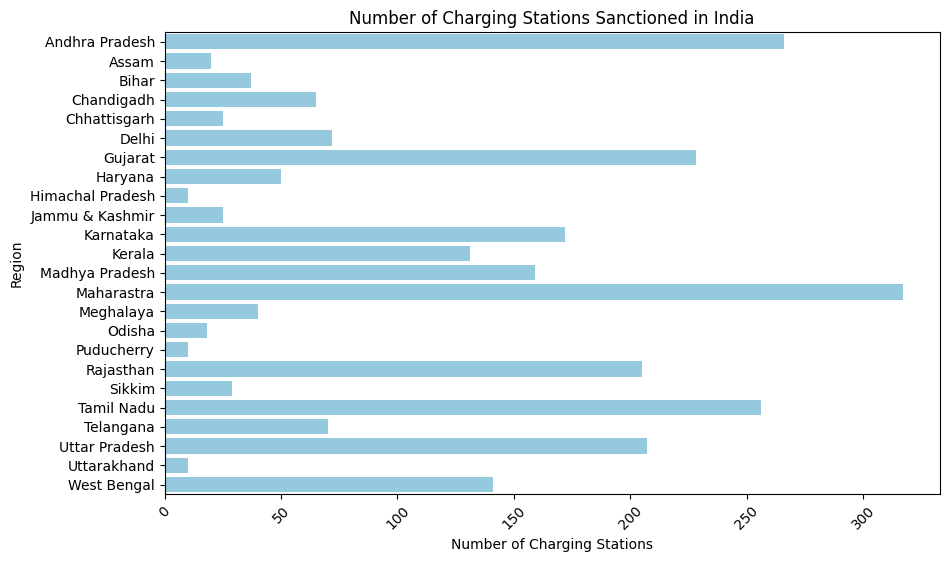

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df1,y=df1['Region'].sort_values(ascending=True), x=df1['Chargers'], color='skyblue')
plt.title('Number of Charging Stations Sanctioned in India')
plt.ylabel('Region')
plt.xlabel('Number of Charging Stations')
plt.xticks(rotation=45)
plt.show()

Observation: Maharashtra, Gujarat, Karnataka, Kerala, Uttar Pradesh, Rajasthan, and Andhra Pradhesh are among the top states with the majority of EV charging stations sanctioned while the remaining states have less number of the same.

### Analysis of EVs based on brands

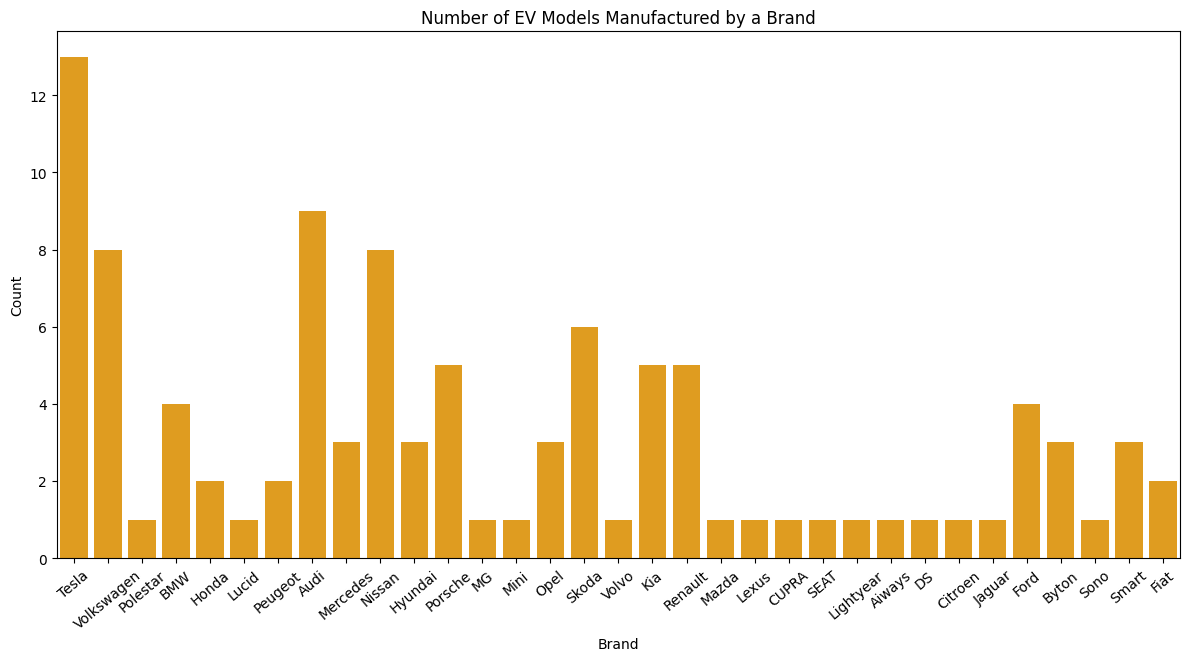

In [15]:
# brand-wise count of EV models
sns.catplot(data=df2, x='Brand', kind='count', color='orange', height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Number of EV Models Manufactured by a Brand')
plt.show()

Observation: Tesla, Audi, Volkswagen, Nissan, Skoda tops the list of EVs with the maximum number of models in the Indian automobile market.

### Anaysis of different body types of EVs

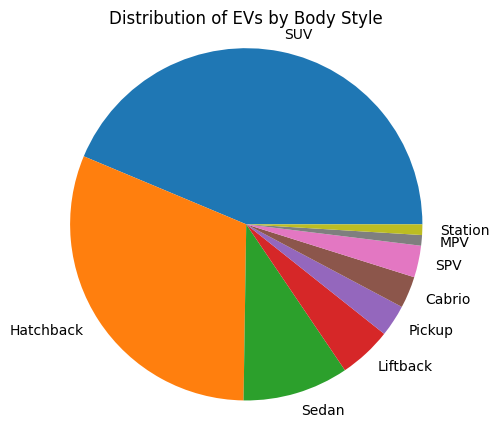

In [16]:
# different body types EVs visualization from dataset 2
plt.figure(figsize=(5, 5))
plt.pie(df2['BodyStyle'].value_counts(), labels=df2['BodyStyle'].value_counts().index)
plt.title('Distribution of EVs by Body Style')
plt.axis('equal') 
plt.show()

Observation: SUV and Hatchback body types form the majority while Station and MPV the minority.

### Top speeds achieved by the cars of a brand

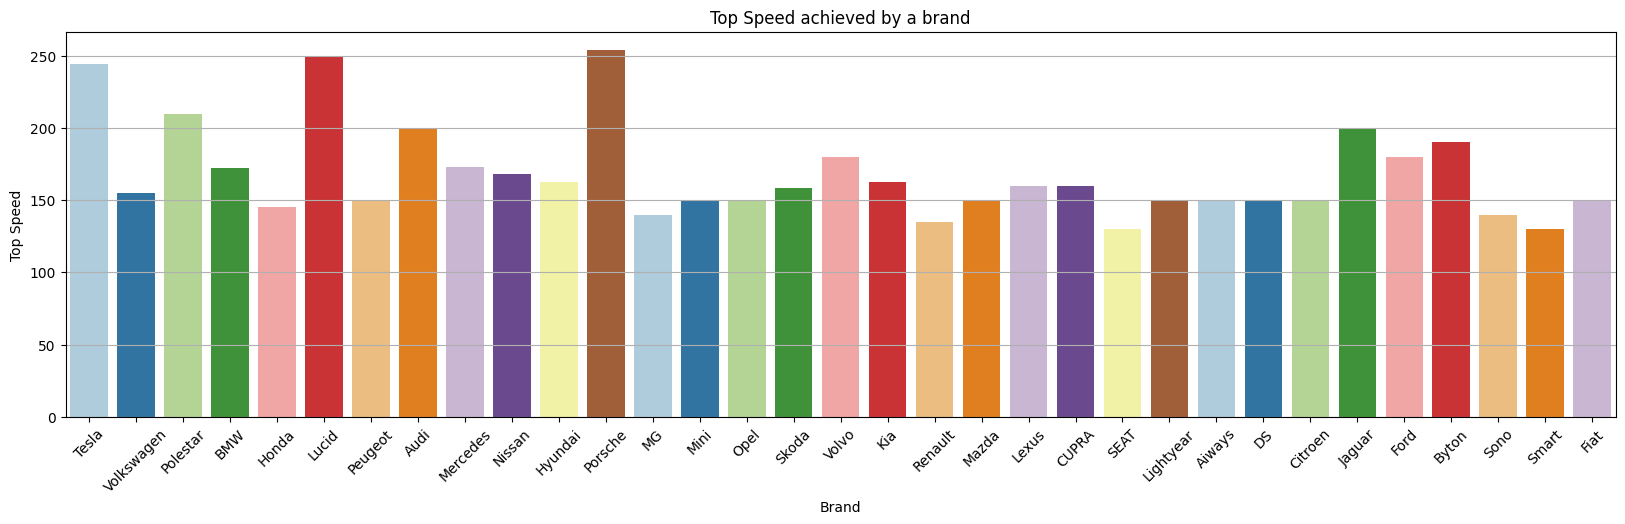

In [17]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='TopSpeed_KmH',data=df2,palette='Paired',errorbar=None)
plt.grid(axis='y')
plt.title('Top Speed achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Top Speed')
plt.xticks(rotation=45)
plt.show()

### Range a car can achieve 

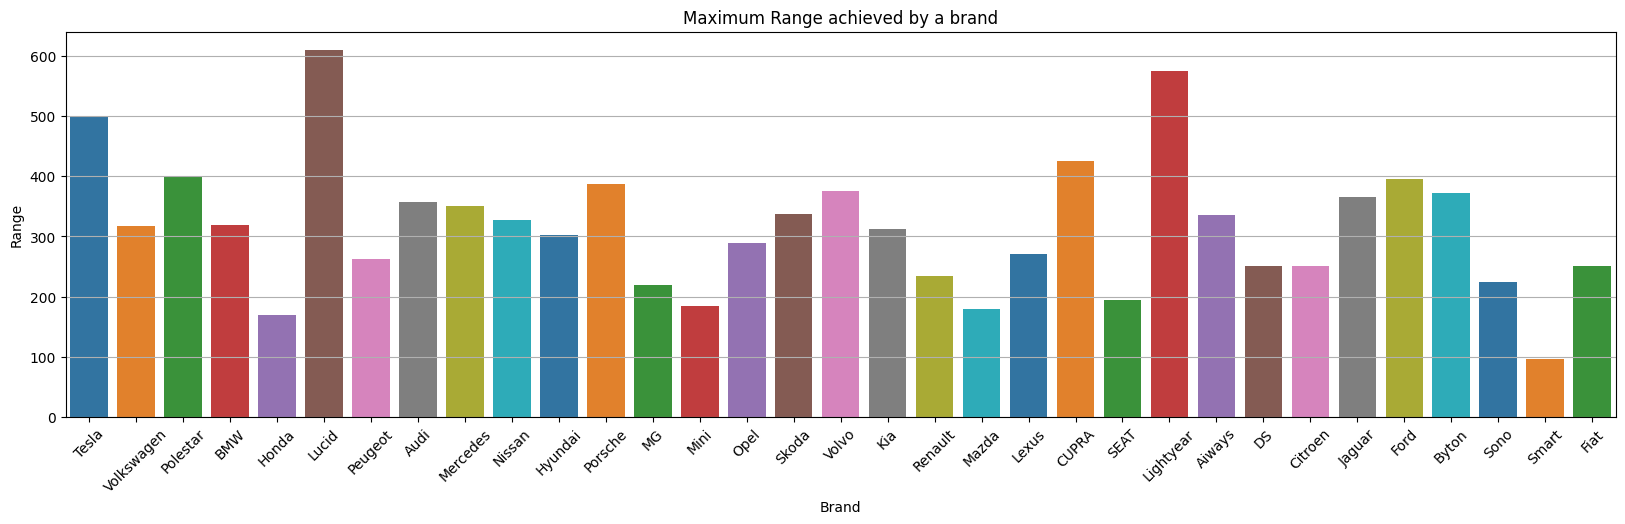

In [18]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Range_Km',data=df2,palette='tab10',errorbar=None)
plt.grid(axis='y')
plt.title('Maximum Range achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Range')
plt.xticks(rotation=45)
plt.show()

### Car efficiency

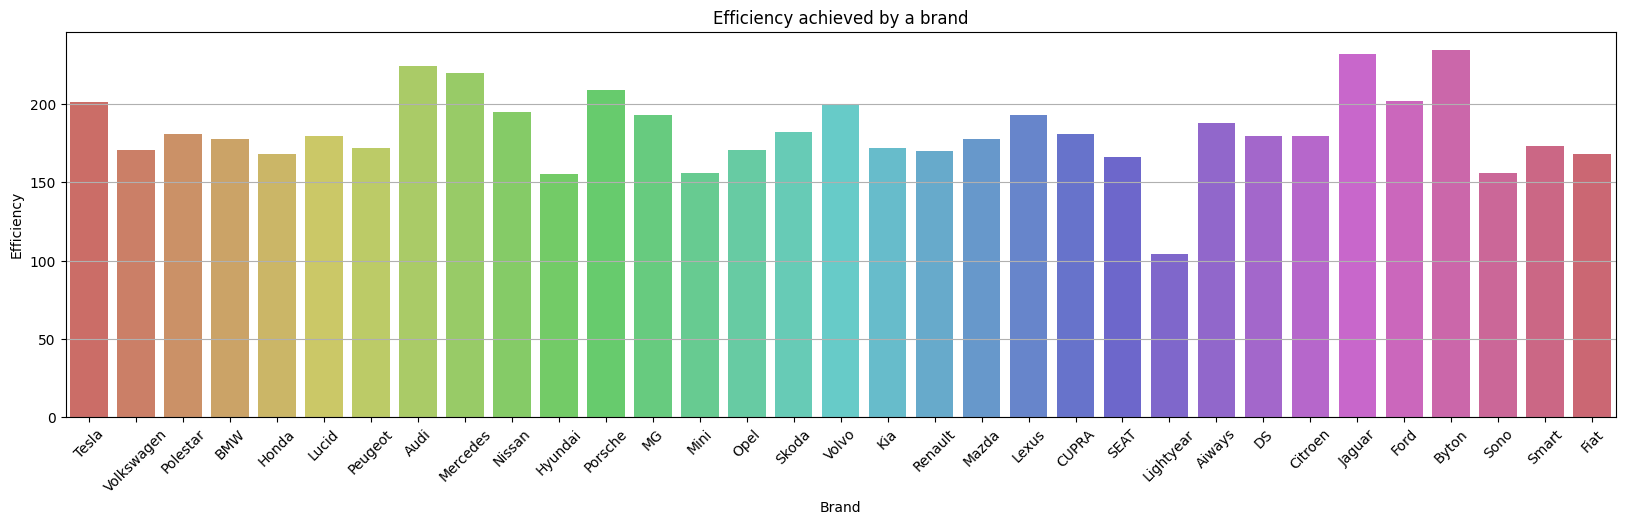

In [19]:
ax= plt.figure(figsize=(20,5))
sns.barplot(x='Brand',y='Efficiency_WhKm',data=df2,palette='hls',errorbar=None)
plt.grid(axis='y')
plt.title('Efficiency achieved by a brand')
plt.xlabel('Brand')
plt.ylabel('Efficiency')
plt.xticks(rotation=45)
plt.show()

### Type of Plug used for charging

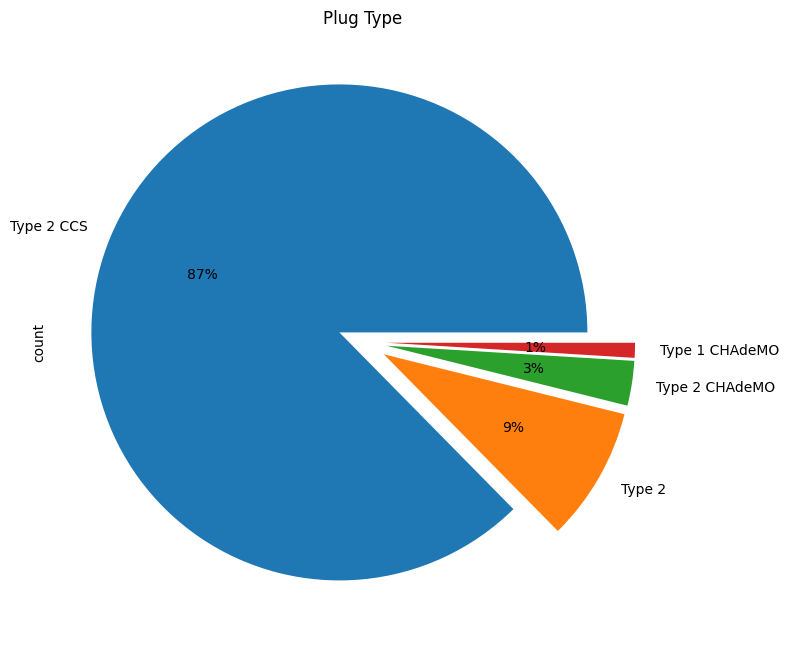

In [20]:
df2['PlugType'].value_counts().plot.pie(figsize=(8,15),autopct='%.0f%%',explode=(.1,.1,.1,.1))
plt.title('Plug Type')
plt.show()

### Analysis of different segments of EVs

In [21]:
# analysis of different segments of EVs from dataset 2

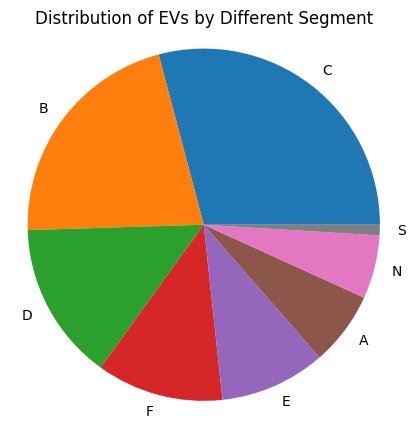

In [22]:
plt.figure(figsize=(5, 5))
plt.pie(df2['Segment'].value_counts(), labels=df2['Segment'].value_counts().index)
plt.title('Distribution of EVs by Different Segment')
plt.axis('equal') 
plt.show()

Observation: B and C body segments form the majority while S and N the minority.

### Analysis of EVs of different number of seats

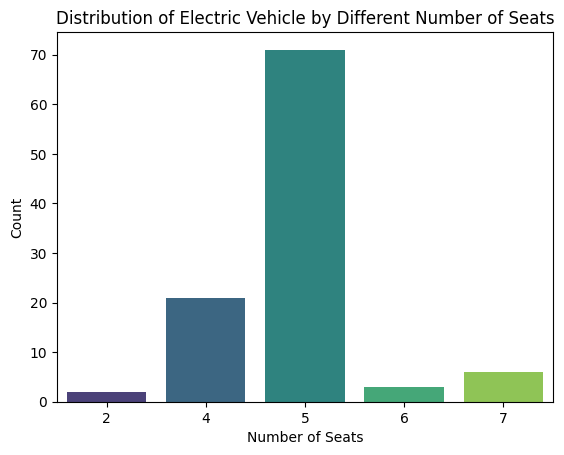

In [23]:
# EVs of different number of seats from dataset 2
sns.countplot(data=df2, x='Seats', palette='viridis')
plt.xlabel('Number of Seats')
plt.ylabel('Count')
plt.title(label='Distribution of Electric Vehicle by Different Number of Seats')
plt.show()


Observation: EVs with 5 sitters dominate the market while EVs with 2 sitters are less in number.



### Analysis of the number of seats by each brand

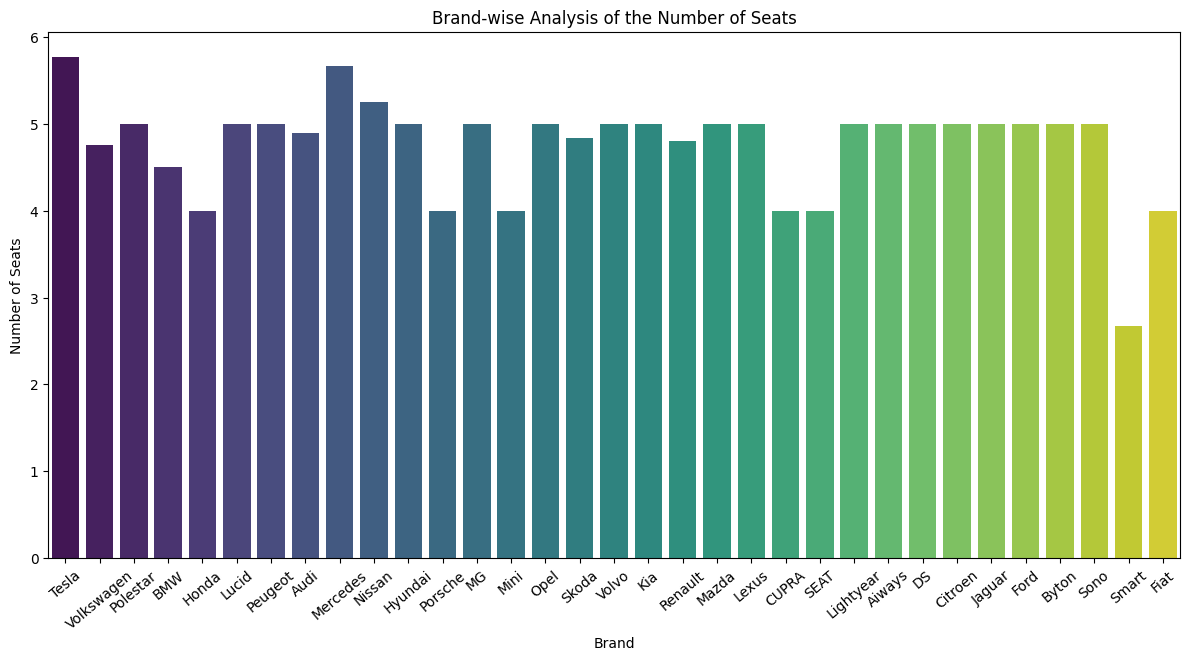

In [24]:
# brand-wise analysis of the number of seats
sns.catplot(kind='bar', data=df2, x='Brand', y='Seats', palette='viridis',errorbar=None,height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand')
plt.ylabel('Number of Seats')
plt.title('Brand-wise Analysis of the Number of Seats')
plt.show()
     

Observation: Based on the number of seats, Tesla, Mercedes and Nissan have the maximum number of seats and Smart the minimum.

### Analysis of different plug types


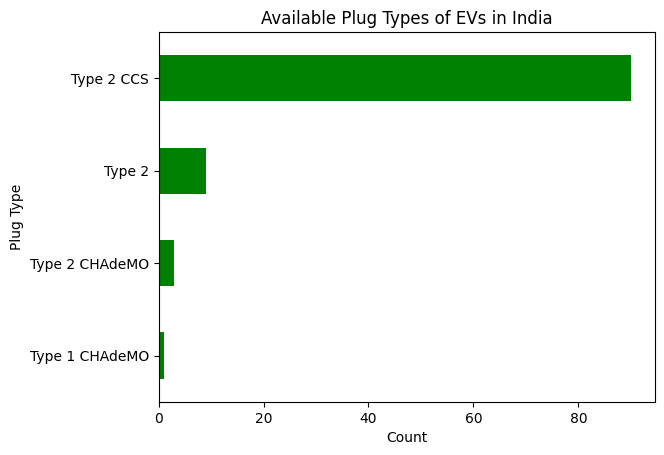

In [25]:
# plug types visualization from dataset 2
df2['PlugType'].value_counts().sort_values(ascending=True).plot.barh(color='green')
plt.xlabel('Count')
plt.ylabel('Plug Type')
plt.title('Available Plug Types of EVs in India')
plt.show()

Observation: EVs with plus type of 'Type 2 CCS' seem to dominate the market.

### Distribution of Price 

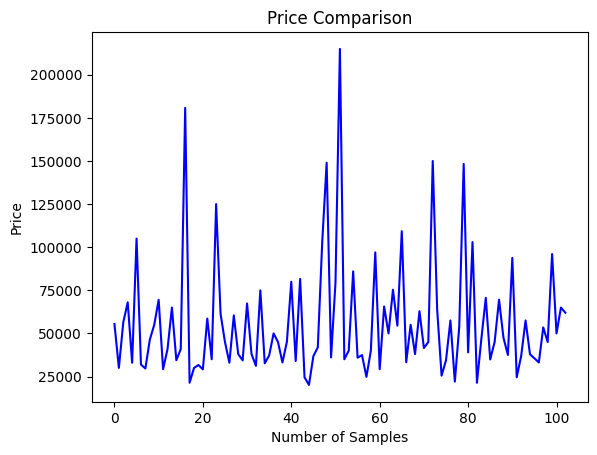

In [26]:
# plotting the price from dataset 2
plt.plot(df2['PriceEuro'], color='blue')
plt.xlabel('Number of Samples')
plt.ylabel('Price')
plt.title('Price Comparison')
plt.show()

### Analysis of EVs based on accleration

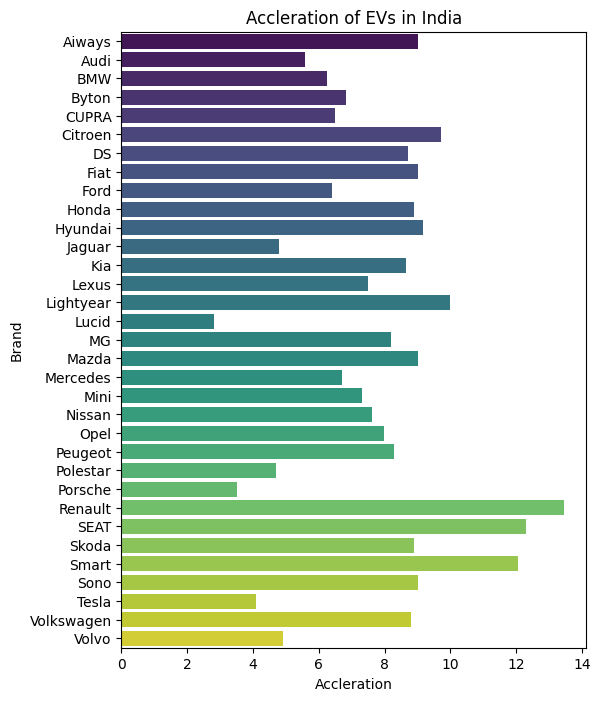

In [27]:
# accleration visualization from dataset 2
plt.figure(figsize=(6, 8))
sns.barplot(data=df2, y=df2['Brand'].sort_values(ascending=True), x=df2['AccelSec'], palette='viridis',errorbar=None)
plt.xlabel('Accleration')
plt.ylabel('Brand')
plt.title(label='Accleration of EVs in India')
plt.show()

Observation: Based on accleration, EVs from Renault, Seat and Smart are the top performers while Tesla, Lucid and Porsche dont make it to the same.



### Analysis of EVs based on speed

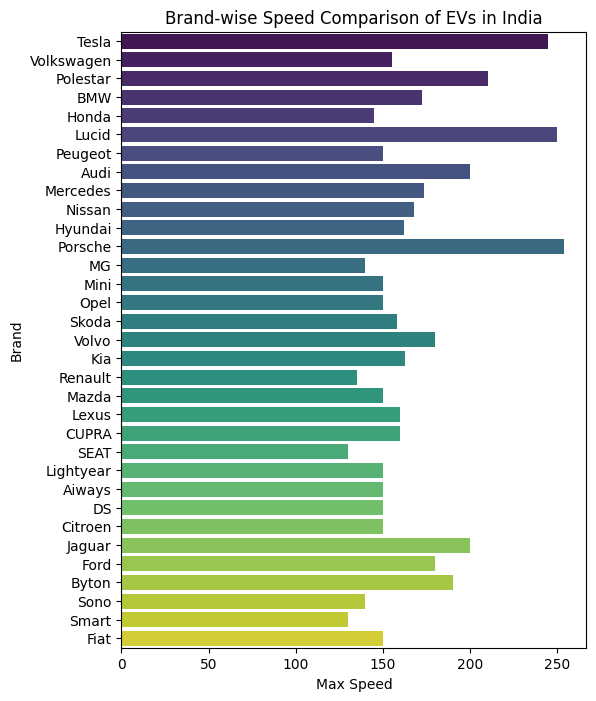

In [28]:
# speed visualization from dataset 2
plt.figure(figsize=(6, 8))
sns.barplot(data=df2, x='TopSpeed_KmH', y='Brand', errorbar=None, palette='viridis')
plt.xlabel('Max Speed')
plt.ylabel('Brand')
plt.title(label='Brand-wise Speed Comparison of EVs in India')
plt.show()

Analysis of EVs based on speed
Observation: Based on speed parameter, EVs from Tesla, Lucid and Porsche are the top performers while Renault, Smart and SEAT dont make it to the same.

### correlation matrix from dataset 2

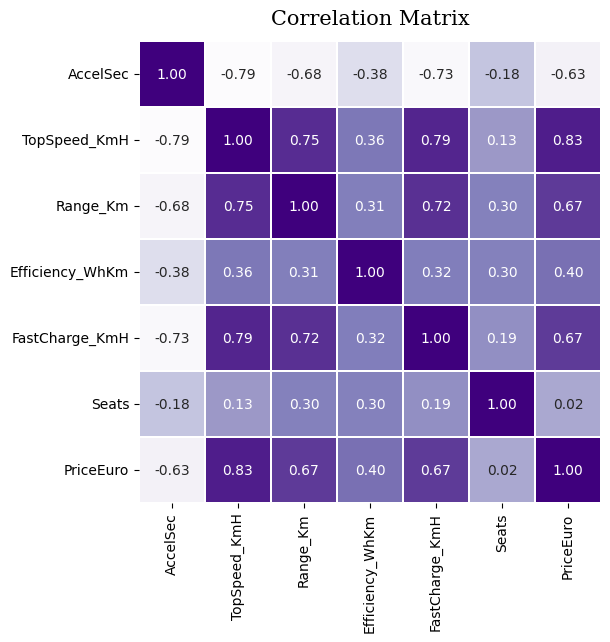

In [29]:
# plotting the correlation matrix from dataset 2
plt.figure(figsize=(6,6))
sns.heatmap(data=df2.corr(numeric_only=True), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', family='serif', size=15, pad=12);

### Analysis of EVs based on the range parameter

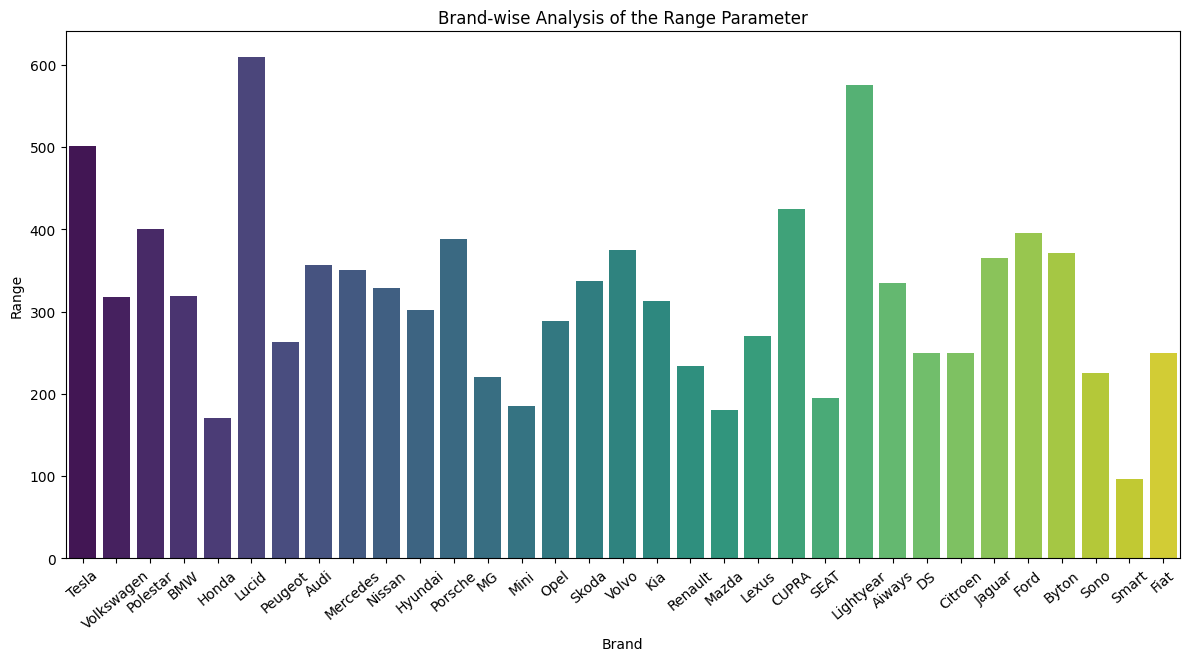

In [30]:
# brand-wise analysis of the range parameter
sns.catplot(kind='bar', data=df2, x='Brand', y='Range_Km', palette='viridis', errorbar=None, height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand')
plt.ylabel('Range')
plt.title('Brand-wise Analysis of the Range Parameter');

Observation: Based on range (Km), Lucid, Lightyear and Tesla have the highest range and Smart the lowest.

First few rows of the dataframe:
          Region     2W     3W    4W  Bus  Chargers
0  Uttar Pradesh   9852  42881   458  197       207
1     Maharastra  38558    893  1895  186       317
2      Karnataka  32844    568   589   57       172
3     Tamil Nadu  25642    396   426    0       256
4        Gujarat  22359    254   423   22       228

Descriptive Statistics:
                 2W            3W           4W         Bus    Chargers
count     24.000000     24.000000    24.000000   24.000000   24.000000
mean    8421.458333   3853.166667   334.041667   28.500000  106.791667
std    10942.261145   8850.690961   476.930628   63.771331   96.623869
min      187.000000    234.000000    12.000000    0.000000   10.000000
25%      848.000000    512.750000    34.750000    0.000000   25.000000
50%     2967.500000    931.000000   129.000000    0.000000   67.500000
75%    10697.750000   2659.250000   434.000000    5.500000  180.250000
max    38558.000000  42881.000000  1895.000000  197.000000  31

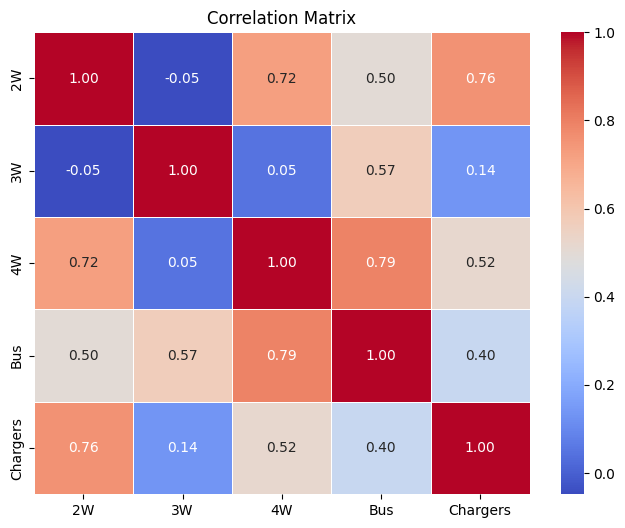

In [31]:
print("First few rows of the dataframe:")
print(df1.head())

# Check descriptive statistics of the dataframe
print("\nDescriptive Statistics:")
print(df1.describe())

# Check correlations between columns
correlation_matrix = df1.corr(numeric_only=True)
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


Descriptive Statistics:
         AccelSec  TopSpeed_KmH    Range_Km  Efficiency_WhKm  FastCharge_KmH  \
count  103.000000    103.000000  103.000000       103.000000      103.000000   
mean     7.396117    179.194175  338.786408       189.165049      444.271845   
std      3.017430     43.573030  126.014444        29.566839      203.949253   
min      2.100000    123.000000   95.000000       104.000000      170.000000   
25%      5.100000    150.000000  250.000000       168.000000      260.000000   
50%      7.300000    160.000000  340.000000       180.000000      440.000000   
75%      9.000000    200.000000  400.000000       203.000000      555.000000   
max     22.400000    410.000000  970.000000       273.000000      940.000000   

            Seats      PriceEuro  
count  103.000000     103.000000  
mean     4.883495   55811.563107  
std      0.795834   34134.665280  
min      2.000000   20129.000000  
25%      5.000000   34429.500000  
50%      5.000000   45000.000000  
75%      

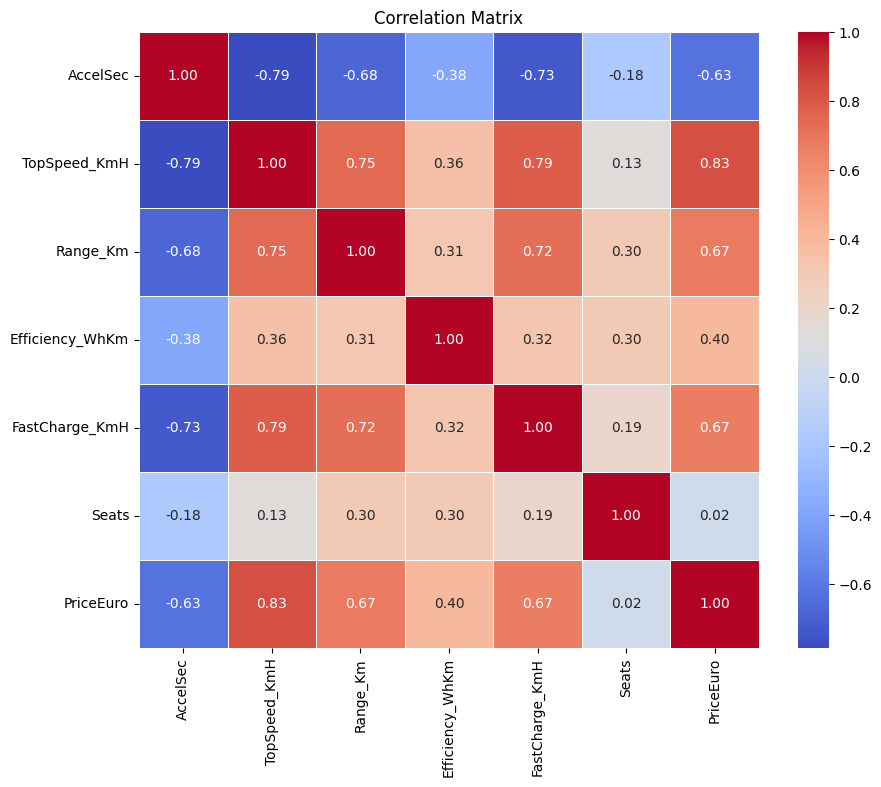

In [32]:
# Check descriptive statistics of numerical columns
print("\nDescriptive Statistics:")
print(df2.describe())

# Check correlation matrix
correlation_matrix = df2.corr(numeric_only=True)
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Text(0, 0.5, 'Price')

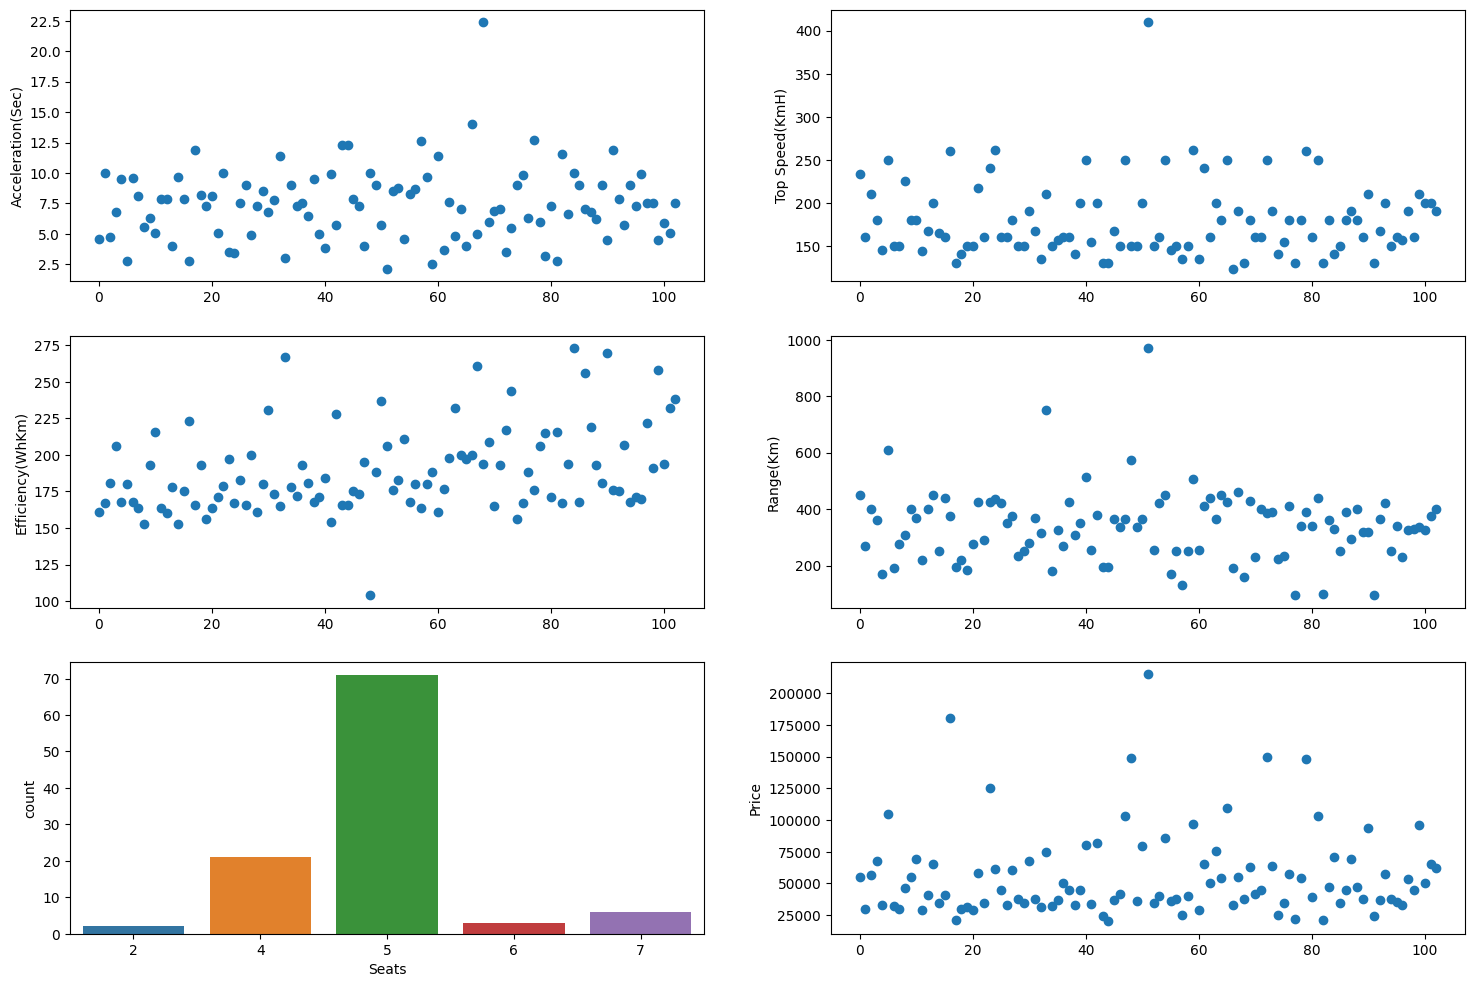

In [33]:
plt.rcParams['figure.figsize']=(18,12)
LIST=[i for i in range(103)]
plt.subplot(321)
plt.scatter(LIST,df2['AccelSec'])
plt.ylabel("Acceleration(Sec)")
plt.subplot(322)
plt.scatter(LIST,df2['TopSpeed_KmH'])
plt.ylabel("Top Speed(KmH)")
plt.subplot(323)
plt.scatter(LIST,df2['Efficiency_WhKm'])
plt.ylabel("Efficiency(WhKm)")
plt.subplot(324)
plt.scatter(LIST,df2['Range_Km'])
plt.ylabel("Range(Km)")
plt.subplot(325)
sns.countplot(data=df2,x='Seats')
plt.subplot(326)
plt.scatter(LIST,df2['PriceEuro'])
plt.ylabel("Price")

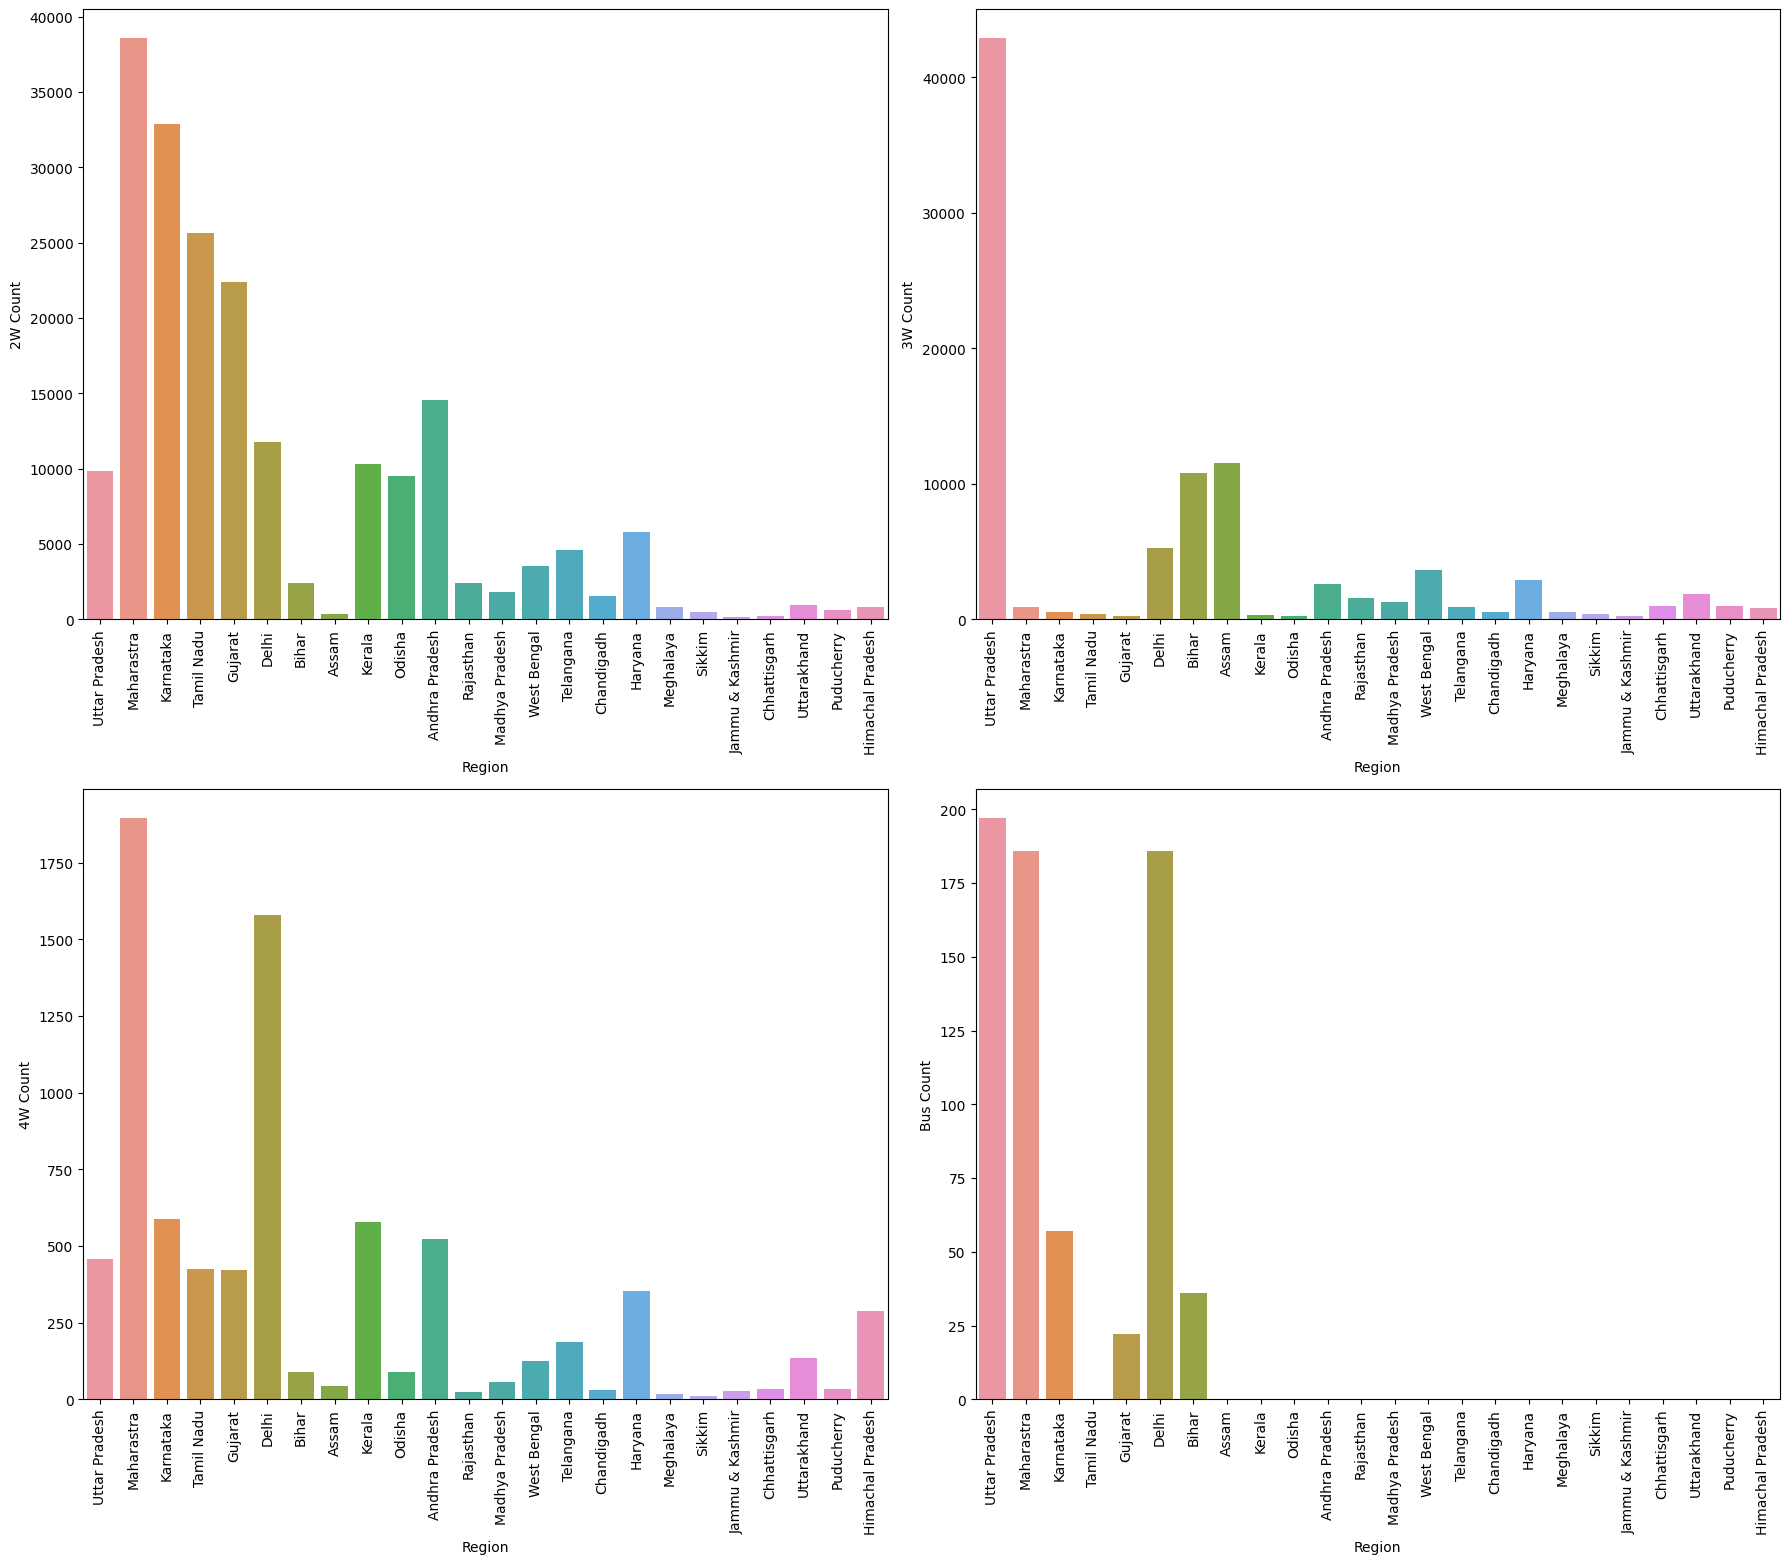

In [34]:
# Plotting
plt.rcParams['figure.figsize']=(18,22)
plt.subplot(321)
sns.barplot(data=df1, x='Region', y='2W')
plt.ylabel("2W Count")
plt.xticks(rotation=90)

plt.subplot(322)
sns.barplot(data=df1, x='Region', y='3W')
plt.ylabel("3W Count")
plt.xticks(rotation=90)

plt.subplot(323)
sns.barplot(data=df1, x='Region', y='4W')
plt.ylabel("4W Count")
plt.xticks(rotation=90)

plt.subplot(324)
sns.barplot(data=df1, x='Region', y='Bus')
plt.ylabel("Bus Count")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Model Building Using K-Means Clusteing

In [35]:
# encoding the categorical features

# PowerTrain feature
df2['PowerTrain'].replace(to_replace=['RWD','FWD','AWD'],value=[0, 1, 2],inplace=True)

# RapidCharge feature
df2['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)

In [36]:
# selecting features for building a model
X = df2[['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]

In [37]:
# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
# applying Principle Component Analysis (PCA)
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.429225,-0.554599,-1.147772,-0.882791,0.839988,-0.959297,0.998880,0.711148,-0.396662
1,-2.322483,-0.345449,0.896473,-1.305529,0.079598,0.235116,-0.213678,-0.544135,-0.181867
2,1.587851,0.008899,-0.650523,0.041024,0.593537,-0.698248,0.058718,0.248837,-0.202775
3,0.291018,-0.000150,-0.307702,-0.514196,-1.608861,0.291624,0.364999,-0.235543,0.261663
4,-2.602679,-0.626489,-0.888088,0.585294,-0.802108,0.027387,-0.084955,-0.507790,-0.049904


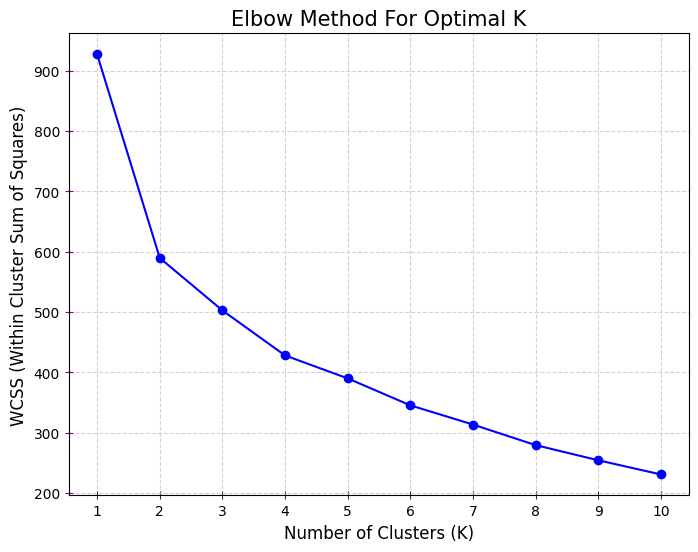

In [39]:
# plotting the results of Elbow
wcss = []


for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=90, n_init=10)  
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method For Optimal K', fontsize=15)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('WCSS (Within Cluster Sum of Squares)', fontsize=12)
plt.xticks(range(1, 11))
plt.grid(True, linestyle='--', color='lightgray')
plt.tick_params(axis='both', direction='inout', length=6, color='purple')
plt.show()


In [40]:
# training the model using k=4 as rendered by the above plot
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90,n_init=10)
kmean.fit(X_pca)

KMeans(n_clusters=4, n_init=10, random_state=90)

In [41]:
# check the labels assigned to each data point
print(kmean.labels_)

[3 0 2 1 1 3 0 0 1 2 2 1 1 2 0 1 3 1 0 1 1 2 1 3 3 1 1 2 0 0 2 1 1 2 1 1 1
 0 0 2 3 1 2 1 1 1 1 3 3 0 2 3 1 1 2 1 1 0 1 3 0 2 2 2 0 3 1 2 0 2 1 2 3 2
 1 1 2 0 2 3 1 2 0 1 2 1 2 2 2 1 2 0 0 2 1 1 1 0 1 2 2 2 2]


In [42]:
# check the size of clusters
pd.Series(kmean.labels_).value_counts()

1    39
2    32
0    19
3    13
Name: count, dtype: int64

In [43]:
# adding a new feature of cluster labels to the dataset 3
df2['clusters'] = kmean.labels_

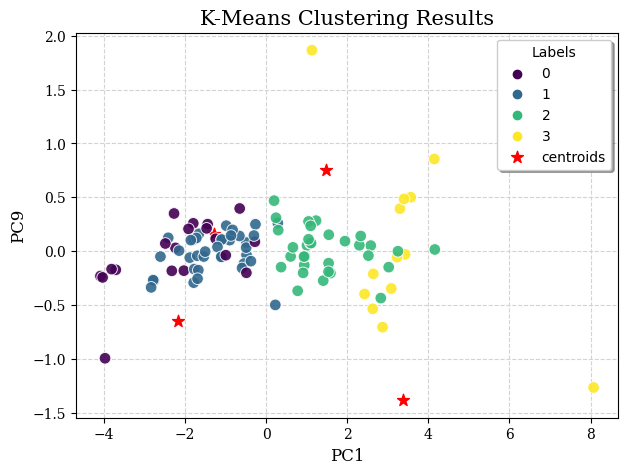

In [44]:
# visualizing clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC9', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC9', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()

In [45]:
df2

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro,clusters
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,1,2,Type 2 CCS,Sedan,D,5,55480,3
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,0,0,Type 2 CCS,Hatchback,C,5,30000,0
2,Polestar,2,4.7,210,400,181,620,1,2,Type 2 CCS,Liftback,D,5,56440,2
3,BMW,iX3,6.8,180,360,206,560,1,0,Type 2 CCS,SUV,D,5,68040,1
4,Honda,e,9.5,145,170,168,190,1,0,Type 2 CCS,Hatchback,B,4,32997,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,1,1,Type 2 CCS,Hatchback,C,5,45000,1
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,1,2,Type 2 CCS,SUV,E,5,96050,2
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,1,2,Type 2 CCS,Hatchback,C,5,50000,2
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,1,2,Type 2 CCS,Hatchback,C,5,65000,2
